In [66]:
%pylab inline
from __future__ import print_function, division
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats
import brewer2mpl

Populating the interactive namespace from numpy and matplotlib


In [25]:
#load dataframe, calculate mean and SEM

FIR_df = pd.read_csv('Data/FIR_df.csv')

mean_df = FIR_df.groupby(['ROI','Condition','Volume']).aggregate(np.mean).reset_index()
sem_df = FIR_df.groupby(['ROI','Condition','Volume']).aggregate(scipy.stats.sem).reset_index()

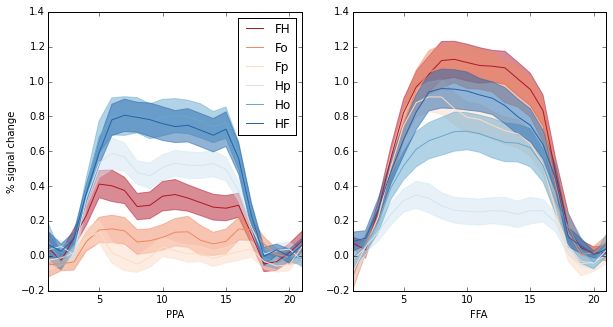

In [104]:
#conditions
ROIs = ['FFA', 'PPA']
Conditions =['FH', 'Fo', 'Fp', 'Hp', 'Ho', 'HF']
x = np.arange(1,22)
#get colormap
cmap = brewer2mpl.get_map('RdBu','diverging', 6)
plt.figure(1)
plt.figure(figsize=(10,5))
for r, roi in enumerate(ROIs):
    plt.subplot(1, 2, r)
    for i, c in enumerate(Conditions):
        y = np.array(mean_df[(mean_df['ROI'] == roi) & (mean_df['Condition'] == c)]['Beta'])
        error = np.array(sem_df[(mean_df['ROI'] == roi) & (mean_df['Condition'] == c)]['Beta'])
        plt.plot(x, y, color = cmap.hex_colors[i], label=c )
        plt.fill_between(x, y-error, y+error, alpha=0.5, edgecolor=cmap.hex_colors[i], 
                     facecolor=cmap.hex_colors[i])
        ylim( -0.2, 1.4 )
        xlim( 1, 21 )
        
        plt.xlabel(roi)

legend()
plt.ylabel('% signal change')